## Proyecto #1
# Regresión Lineal en Python
Jerson Ochoa Barillas

### 2. Usando slicing con Numpy separar los datos en 2 datasets: entrenamiento (80%) y validación y pruebas (20%).

In [118]:
# Importar librerías globales
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Cargar los datos
data = np.load('./proyecto_data/proyecto_training_data.npy')
data

In [ ]:
# Averiguamos cuantas filas y columnas tiene el arreglo: 1460,6
data.shape


In [ ]:
# Convertimos los datos en un DataFrame utilizando el snipet incluído en la información del proyecto para las columnas
# Se convierte en DataFrame para poder usar las funciones de pandas para hacer slicing
dfData = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dfData

In [ ]:
# Dividimos los datos para entrenamiento y validación (80%) usando iloc de pandas
dataTraining = dfData.iloc[0:(int(len(data) * 0.8))]
dataTraining

In [ ]:
# Dividimos los datos para pruebas (20%) usando iloc de pandas
dataTests = dfData.iloc[(int(len(data) * 0.8)):]
dataTests

### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas):
- Media
- Valor máximo
- Valor mínimo
- Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- Desviación estándar

In [ ]:
# Eliminamos valores nulos del dataframe para prevenir errores
dfData.fillna(0)
# Obtenemos las estadísticas con la función describe
dataStatisticsGeneral = dfData.describe()
# Aqui obtenemos promedio, maximo, mínimo, desviación estándar
dataStatistics = dataStatisticsGeneral.loc[["mean", "max", "min", "std"],:] 
dataStatistics

In [ ]:
# Aquí obtenemos rango pico a pico
rango = np.ptp(dfData.fillna(0), axis=0)
rango

In [ ]:
# Ajustamos el objeto rango para que los títulos se ajusten al df de estadísticas dandole la vuelta con la función transpose de pandas
rangoTranspose = pd.DataFrame(rango).transpose()
rangoTranspose

In [ ]:
# Agregamos el rango al df de estadísticas usando la función concat de pandas
dataStatisticsGeneral = pd.concat([dataStatistics, rangoTranspose])
dataStatisticsGeneral

In [ ]:
# Renombramos la fila de rango
dataStatisticsGeneral = dataStatisticsGeneral.rename(index={0: 'rank'})
dataStatisticsGeneral

### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable

In [ ]:
dfData.columns
for col in dfData.columns:
    sb.displot(dfData[col])
    plt.show()

# Distplot se encuentra deprecado, en su lugar se utiliza la función displot

### 5. Para cada variable independiente x: 
- Calcular el coeficiente de correlación entre x y y
- Graficar x vs y (scatterplot) usando matplotlib
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica
- Basado en la gráfica y el coeficiente de correlación de cada par (x,y) elegir las 2 variables con más potencial predictivo, es decir, las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [ ]:
# Calculamos coeficiente de correlación de cada columna usando método de Pearson
dictCorrelacion = dict()
auxDict = dict()
# Recorremos cada columna y guardamos sus resultados en un diccionario
for i in dfData.columns:
    auxDict = {}
    for j in dfData.columns:
        if (i != j):
            auxDict[j] = dfData[i].corr(dfData[j], method='pearson')
    dictCorrelacion[i] = auxDict
dictCorrelacion['SalePrice']

In [ ]:
# 2da manera de calcular coeficiente de correlación, obtenemos mismos datos que en la primer forma
dfDataCorr = dfData.corr(method='pearson')
dfDataCorr

In [ ]:
# Graficamos x vs y (scatterplot) usando matplotlib
# Calcular y colocar el coeficiente de correlación como parte del título de la gráfica

a = 0
b = 0
for i in dfData.columns:
    b = 0
    for j in dfData.columns:
        if (i != j):
            fig, ax = plt.subplots(1, 1, figsize=(10,6))
            ax.scatter(x = dfData[i], y = dfData[j])
            ax.set_xlabel(i)
            ax.set_ylabel(j)
            plt.title("Coeficiente de correlación: {}".format(dictCorrelacion[i][j]))
        plt.show()
        b += 1
    a += 1

In [ ]:
# Basado en la gráfica y el coeficiente de correlación de cada par x, y elegir las 2 variables con más
# potencial predictivo, es decir, las 2 variables que presentan mayor correlación entre dicha variable 
# y la variable dependiente

dfDataCorr

# Según el cálculo de correlación, la variable más alta es SalePrice con OverallQual presentando un 0.79
# Como dato: 1 = Correlación lineal positiva perfecta | -1 = Correlación lineal negativa perfecta 
# (Coeficiente de Pearson)

### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = B0 + B1 * x. 
#### La función recibe como argumentos: 
- Vector con la variable independiente x
- Vector con la variable dependiente y
- Un entero epochs que indica por cuantas iteraciones entrenar el modelo
- Un entero imprimir_error_cada, que nos indica cada cuantas iteraciones queremos imprimir a través de print: el numero de iteraciónm el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones 10, 20, 30, 40, 50
- Escalar (learning rate): Es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo

In [ ]:
# Datos a utilizar
vectorCost = []
dictParamsHistory = dict()
yPredHist = []
dataTraining

In [ ]:
def trainingRegL(vectorX, y, epochs, imprimir_error_cada, learningRate):
    # Creando matriz de 2 columnas, primera con vector x y segunda con 1
    matrizTrainingX = pd.DataFrame(vectorX)
    matrizTrainingX['y'] = 1

    # Inicializar los parámetros del modelo 
    b0 = 0.2
    b1 = 0.1
    vectorb0b1 = [b1, b0]

    print("Epochs: {}".format(epochs))

    # Iteraciones
    for i in range(epochs):
        
        # Cálculo de predicción o estimación y_pred = b0 + b1 * X  <-- Fórmula a aplicar
        y_pred = [np.dot(j, vectorb0b1) for j in matrizTrainingX.values]

        # Calculamos el costo error de la iteración
        curr_cost = (1/(2*(len(y)))) * np.sum(((y - y_pred)**2))
        vectorCost.append([i, curr_cost])

        # Calcular el gradiente del error respecto de cada parámetro
        # Generamos el vector de y pred - y para usar en la operación
        y_pred_y = y_pred - y

        # Aplicación de fórmula del gradiente del error respecto a cada parámetro
        curr_grad = np.sum(
                            [
                                (
                                    (c * y_pred_y[k]) * 
                                    (1 / len(matrizTrainingX.values))
                                ) for k, c in enumerate(matrizTrainingX.values)
                            ], axis=0)
        
        # Actualizando parámetros del modelo
        newVectorb0b1 = np.array(vectorb0b1)
        newCurr_Grad = np.array(curr_grad) * learningRate
        newParamsb0b1 = newVectorb0b1 - newCurr_Grad
        vectorb0b1 = newParamsb0b1

        # Almacenar en una estructura de datos el modelo resultante
        dictParamsHistory[i] = newParamsb0b1
        yPredHist = y_pred

        if (i % imprimir_error_cada == 0):
            print("Error de iteración {}: {}".format(i, curr_cost))

    print(y_pred)
    return dictParamsHistory, vectorCost, yPredHist


In [ ]:
vectorCost = []
dictParamsHistory = dict()
respParamsHistory, respVectorCost, respYPred = trainingRegL(dataTraining['OverallQual'], dataTraining['SalePrice'], 400, 50, 0.001)

In [ ]:
# Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo

def graphError(vectError):
    df_respVectorCost = pd.DataFrame(vectError)
    df_respVectorCost = df_respVectorCost.rename(columns={0: 'Epochs', 1:'Error'})
    df_respVectorCost.plot(x='Epochs', y='Error')
    plt.show()

graphError(respVectorCost)

In [ ]:
# Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo

def graphModelByEpochs(model,  interval):
    newModel = dict()
    for i in range(len(model)):
        if ((i + 1) % interval == 0):
            newModel[i] = model[i]
    df_paramsHistory = pd.DataFrame(newModel)
    df_paramsHistory = df_paramsHistory.transpose()
    df_paramsHistory = df_paramsHistory.rename(columns={0: 'x', 1:'y'})
    df_paramsHistory.plot(x='x', y='y')
    plt.show()

graphModelByEpochs(respParamsHistory, 10)


In [ ]:
# Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal para cada una de las variables x elegidas

# Modelo de regresión X = SalePrice , Y = OverallQual
vectorCost = []
dictParamsHistory = dict()
respParamsHistory, respVectorCost, respYPred = trainingRegL(dataTraining['OverallQual'], dataTraining['SalePrice'], 200, 100, 0.001)
graphError(respVectorCost)
graphModelByEpochs(respParamsHistory, 10)

In [ ]:
# Limpieza de datos
dataTraining['1stFlrSF'] = dataTraining['1stFlrSF'].fillna(0)
dataTraining['TotRmsAbvGrd'] = dataTraining['TotRmsAbvGrd'].fillna(0)
dataTraining['YearBuilt'] = dataTraining['YearBuilt'].fillna(0)
dataTraining['LotFrontage'] = dataTraining['LotFrontage'].fillna(0)

In [ ]:
# Modelo de regresión X = TotRmsAbvGrd , Y = 1stFlrSF
vectorCost = []
dictParamsHistory = dict()
respParamsHistory, respVectorCost, respYPred = trainingRegL(dataTraining['TotRmsAbvGrd'], dataTraining['1stFlrSF'], 150, 100, 0.001)
graphError(respVectorCost)
graphModelByEpochs(respParamsHistory, 10)

In [ ]:
# Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal

dt_X_training = dataTraining['SalePrice'][:, None]
dt_Y_training = dataTraining['OverallQual'][:, None]

dt_X_test = dataTests['SalePrice'][:, None]
dt_Y_test = dataTests['OverallQual'][:, None]

# Creamos el objeto de regresión lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo usando el dataset de entrenamiento
regr.fit(dt_X_training, dt_Y_training)

# Hacemos las predicciones usando el set de entrenamiento
dt_y_pred = regr.predict(dt_X_training)

# Los coeficientes
print("Coeficientes: \n", regr.coef_)

# La media de error
print("Error cuadrático medio: %2f" % mean_squared_error(dt_Y_training, dt_y_pred))

#Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %2f" % r2_score(dt_Y_training, dt_y_pred))

# Plot outputs
plt.scatter(dt_X_training, dt_Y_training, color="black")
plt.plot(dt_X_training, dt_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo
# de scikit-learn calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción 
# estimada promediando las predicciones de los 2 modelos.

def predEstimada(manualTrainingVector, scikitTrainingVector):
    arrMean = []
    manualTrainingVector = np.array(manualTrainingVector).reshape(1168,1)
    scikitTrainingVector = np.array(scikitTrainingVector).reshape(1168,1)

    for i in range(len(manualTrainingVector)):
        # print(manualTrainingVector[i][0])
        arrMean.append(np.mean([manualTrainingVector[i][0],scikitTrainingVector[i][0]]))

    return manualTrainingVector, scikitTrainingVector, arrMean

mtVector, stVector, arrMeanResponse = (predEstimada(respYPred, dt_y_pred))
print(arrMeanResponse)

In [ ]:
# Limpieza de datos
dataTests['1stFlrSF'] = dataTests['1stFlrSF'].fillna(0)
dataTests['TotRmsAbvGrd'] = dataTests['TotRmsAbvGrd'].fillna(0)
dataTests['YearBuilt'] = dataTests['YearBuilt'].fillna(0)
dataTests['LotFrontage'] = dataTests['LotFrontage'].fillna(0)

In [ ]:
# Usando el 20 % de los datos de validación aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo.
# Graficar el error de cada modelo para la variable x
# Concluir cuál modelo para la variable x es el mejor a ser usado.

auxTest = dataTests.copy()
auxTest.reset_index(inplace=True)
auxTest = auxTest.drop(['index'], axis=1)

for col in dataTests.columns:
    if (col != 'OverallQual'):
        vectorCost = []
        dictParamsHistory = dict()
        yPredHist = []

        respParamsHistoryTest = dict()
        respVectorCostTest = []
        respYPredTest = []

        print("Imprimiendo error de x = OverallQuall contra Y = {}".format(col))

        respParamsHistoryTest, respVectorCostTest, respYPredTest = trainingRegL(auxTest['OverallQual'], auxTest[col], 200, 50, 0.001)
        graphError(respVectorCostTest)


## Reestructuración aplicando POO

In [119]:
# Reestructurando en clases para aplicar POO
class RegresionLineal():

    def __init__(self, stringLocation):
        self.dataLocation = stringLocation

    @classmethod
    def loadData(cls, stringLocation):
        data = np.load(stringLocation)
        print("Archivo de datos ha sido cargado")
        return data

    @classmethod
    def getTrainingData(cls, dataMaster):
        return dataMaster.iloc[0:(int(len(dataMaster) * 0.8))]
    
    @classmethod
    def getTestData(cls, dataMaster):
        return dataMaster.iloc[(int(len(dataMaster) * 0.8)):]
    
    @classmethod
    def getDataStatistics(cls, dataMaster):
        # Obtenemos las estadísticas con la función describe
        dataStatisticsGeneral = dataMaster.describe()
        # Aqui obtenemos promedio, maximo, mínimo, desviación estándar
        dataStatistics = dataStatisticsGeneral.loc[["mean", "max", "min", "std"],:] 

        # Aquí obtenemos rango pico a pico
        rango = np.ptp(dataMaster.fillna(0), axis=0)

        # Ajustamos el objeto rango para que los títulos se ajusten al df de estadísticas dandole la vuelta con la función transpose de pandas
        rangoTranspose = pd.DataFrame(rango).transpose()
        
        # Agregamos el rango al df de estadísticas usando la función concat de pandas
        dataStatisticsGeneral = pd.concat([dataStatistics, rangoTranspose])

        # Renombramos la fila de rango
        dataStatisticsGeneral = dataStatisticsGeneral.rename(index={0: 'rank'})
        return dataStatisticsGeneral
    
    @classmethod
    def plotHistWithSeaborn(cls, dataMaster):
        for col in dataMaster.columns:
            sb.displot(dataMaster[col])
            plt.show()

    @classmethod
    def getCorrCoef(cls, dataMaster):
        # Calculamos coeficiente de correlación de cada columna usando método de Pearson
        dictCorrelacion = dict()
        auxDict = dict()
        # Recorremos cada columna y guardamos sus resultados en un diccionario
        for i in dataMaster.columns:
            auxDict = {}
            for j in dataMaster.columns:
                if (i != j):
                    auxDict[j] = dataMaster[i].corr(dataMaster[j], method='pearson')
            dictCorrelacion[i] = auxDict
        return dictCorrelacion
    
    @classmethod
    def getCorrCoef_v2(cls, dataMaster):
        # 2da manera de calcular coeficiente de correlación, obtenemos mismos datos que en la primer forma
        return dataMaster.corr(method='pearson')
    
    @classmethod
    def scatterPlotCorrelation(cls, dataMaster, dictCorr):
        # Graficamos x vs y (scatterplot) usando matplotlib
        # Calcular y colocar el coeficiente de correlación como parte del título de la gráfica

        a = 0
        b = 0
        for i in dataMaster.columns:
            b = 0
            for j in dataMaster.columns:
                if (i != j):
                    fig, ax = plt.subplots(1, 1, figsize=(10,6))
                    ax.scatter(x = dataMaster[i], y = dataMaster[j])
                    ax.set_xlabel(i)
                    ax.set_ylabel(j)
                    plt.title("Coeficiente de correlación: {}".format(dictCorr[i][j]))
                plt.show()
                b += 1
            a += 1

    @classmethod
    def trainingRegL(cls, vectorX, y, epochs, imprimir_error_cada, learningRate):
        # Creando matriz de 2 columnas, primera con vector x y segunda con 1
        matrizTrainingX = pd.DataFrame(vectorX)
        matrizTrainingX['y'] = 1

        # Inicializar los parámetros del modelo 
        b0 = 0.2
        b1 = 0.1
        vectorb0b1 = [b1, b0]

        print("Epochs: {}".format(epochs))

        # Iteraciones
        for i in range(epochs):
            
            # Cálculo de predicción o estimación y_pred = b0 + b1 * X  <-- Fórmula a aplicar
            y_pred = [np.dot(j, vectorb0b1) for j in matrizTrainingX.values]

            # Calculamos el costo error de la iteración
            curr_cost = (1/(2*(len(y)))) * np.sum(((y - y_pred)**2))
            vectorCost.append([i, curr_cost])

            # Calcular el gradiente del error respecto de cada parámetro
            # Generamos el vector de y pred - y para usar en la operación
            y_pred_y = y_pred - y

            # Aplicación de fórmula del gradiente del error respecto a cada parámetro
            curr_grad = np.sum(
                                [
                                    (
                                        (c * y_pred_y[k]) * 
                                        (1 / len(matrizTrainingX.values))
                                    ) for k, c in enumerate(matrizTrainingX.values)
                                ], axis=0)
            
            # Actualizando parámetros del modelo
            newVectorb0b1 = np.array(vectorb0b1)
            newCurr_Grad = np.array(curr_grad) * learningRate
            newParamsb0b1 = newVectorb0b1 - newCurr_Grad
            vectorb0b1 = newParamsb0b1

            # Almacenar en una estructura de datos el modelo resultante
            dictParamsHistory[i] = newParamsb0b1
            yPredHist = y_pred

            if (i % imprimir_error_cada == 0):
                print("Error de iteración {}: {}".format(i, curr_cost))

        return dictParamsHistory, vectorCost, yPredHist
    
    @classmethod
    def graphError(cls, vectError):
        df_respVectorCost = pd.DataFrame(vectError)
        df_respVectorCost = df_respVectorCost.rename(columns={0: 'Epochs', 1:'Error'})
        df_respVectorCost.plot(x='Epochs', y='Error')
        plt.show()

    @classmethod
    def graphModelByEpochs(cls, model,  interval):
        newModel = dict()
        for i in range(len(model)):
            if ((i + 1) % interval == 0):
                newModel[i] = model[i]
        df_paramsHistory = pd.DataFrame(newModel)
        df_paramsHistory = df_paramsHistory.transpose()
        df_paramsHistory = df_paramsHistory.rename(columns={0: 'x', 1:'y'})
        df_paramsHistory.plot(x='x', y='y')
        plt.show()

    @classmethod
    def graphModelWithScikitLearn(cls, dataTraining, dataTests):
        dt_X_training = dataTraining['SalePrice'][:, None]
        dt_Y_training = dataTraining['OverallQual'][:, None]

        dt_X_test = dataTests['SalePrice'][:, None]
        dt_Y_test = dataTests['OverallQual'][:, None]

        # Creamos el objeto de regresión lineal
        regr = linear_model.LinearRegression()

        # Entrenamos el modelo usando el dataset de entrenamiento
        regr.fit(dt_X_training, dt_Y_training)

        # Hacemos las predicciones usando el set de entrenamiento
        dt_y_pred = regr.predict(dt_X_training)

        # Los coeficientes
        print("Coeficientes: \n", regr.coef_)

        # La media de error
        print("Error cuadrático medio: %2f" % mean_squared_error(dt_Y_training, dt_y_pred))

        #Coeficiente de determinación: 1 es una predicción perfecta
        print("Coeficiente de determinación: %2f" % r2_score(dt_Y_training, dt_y_pred))

        # Plot outputs
        plt.scatter(dt_X_training, dt_Y_training, color="black")
        plt.plot(dt_X_training, dt_y_pred, color="blue", linewidth=3)

        plt.xticks(())
        plt.yticks(())

        plt.show()
        return dt_y_pred

    @classmethod
    # Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo
    # de scikit-learn calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción 
    # estimada promediando las predicciones de los 2 modelos.

    def predEstimada(cls, manualTrainingVector, scikitTrainingVector):
        arrMean = []
        manualTrainingVector = np.array(manualTrainingVector).reshape(1168,1)
        scikitTrainingVector = np.array(scikitTrainingVector).reshape(1168,1)

        for i in range(len(manualTrainingVector)):
            # print(manualTrainingVector[i][0])
            arrMean.append(np.mean([manualTrainingVector[i][0],scikitTrainingVector[i][0]]))

        return manualTrainingVector, scikitTrainingVector, arrMean

### 2. Usando slicing con Numpy separar los datos en 2 datasets: entrenamiento (80%) y validación y pruebas (20%).

In [120]:
#Cargando los datos
loadedData = RegresionLineal.loadData('./proyecto_data/proyecto_training_data.npy')

# Convertimos los datos en un DataFrame utilizando el snipet incluído en la información del proyecto para las columnas
# Se convierte en DataFrame para poder usar las funciones de pandas para hacer slicing
dfData = pd.DataFrame(loadedData, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

# Aplicando slicing
# Dividimos los datos para entrenamiento y validación (80%) y para pruebas (20%) usando iloc de pandas
dataTraining = RegresionLineal.getTrainingData(dfData)
dataTests = RegresionLineal.getTestData(dfData)



Archivo de datos ha sido cargado


In [121]:
# Limpieza de datos
dataTraining['1stFlrSF'] = dataTraining['1stFlrSF'].fillna(0)
dataTraining['TotRmsAbvGrd'] = dataTraining['TotRmsAbvGrd'].fillna(0)
dataTraining['YearBuilt'] = dataTraining['YearBuilt'].fillna(0)
dataTraining['LotFrontage'] = dataTraining['LotFrontage'].fillna(0)

/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/3819290711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTraining['1stFlrSF'] = dataTraining['1stFlrSF'].fillna(0)
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/3819290711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTraining['TotRmsAbvGrd'] = dataTraining['TotRmsAbvGrd'].fillna(0)
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/3819290711.py:4: SettingWithCopyWarning: 
A value is trying

In [122]:
# Limpieza de datos
dataTests['1stFlrSF'] = dataTests['1stFlrSF'].fillna(0)
dataTests['TotRmsAbvGrd'] = dataTests['TotRmsAbvGrd'].fillna(0)
dataTests['YearBuilt'] = dataTests['YearBuilt'].fillna(0)
dataTests['LotFrontage'] = dataTests['LotFrontage'].fillna(0)

/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/1655491498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTests['1stFlrSF'] = dataTests['1stFlrSF'].fillna(0)
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/1655491498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTests['TotRmsAbvGrd'] = dataTests['TotRmsAbvGrd'].fillna(0)
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/1655491498.py:4: SettingWithCopyWarning: 
A value is trying to be set o

### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas):
- Media
- Valor máximo
- Valor mínimo
- Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- Desviación estándar

In [123]:
# Análisis exploratorio de datos
# Eliminamos valores nulos del dataframe para prevenir errores
dfData = dfData.fillna(0)
# Obtenemos las estadísticas
dataStatistics = RegresionLineal.getDataStatistics(dfData)
dataStatistics

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,57.623288
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,0.000000
std,79442.502883,1.382997,386.587738,1.625393,30.202904,34.664304
rank,720100.000000,9.000000,4358.000000,12.000000,138.000000,313.000000


### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable

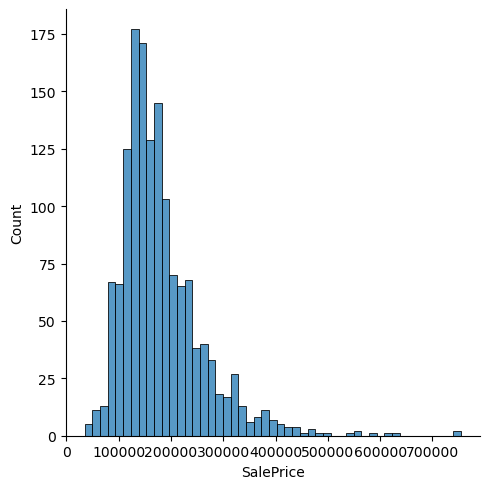

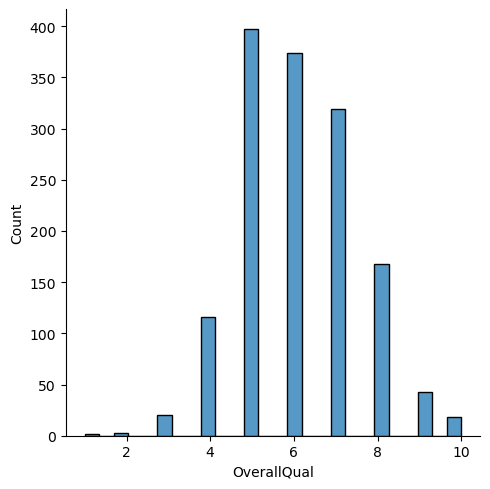

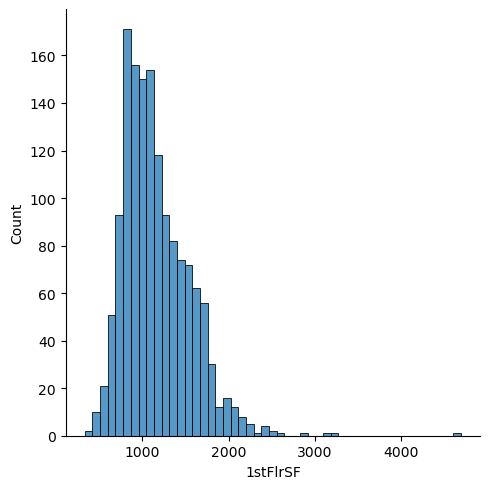

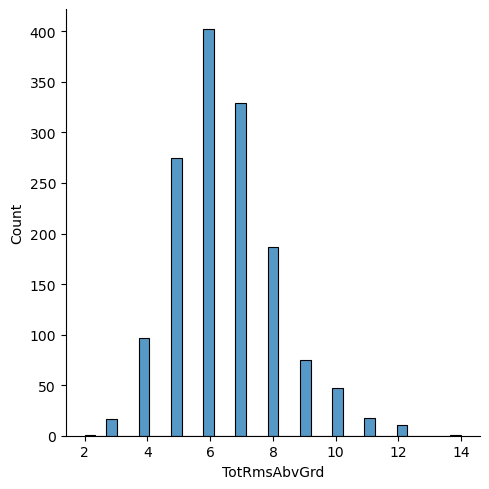

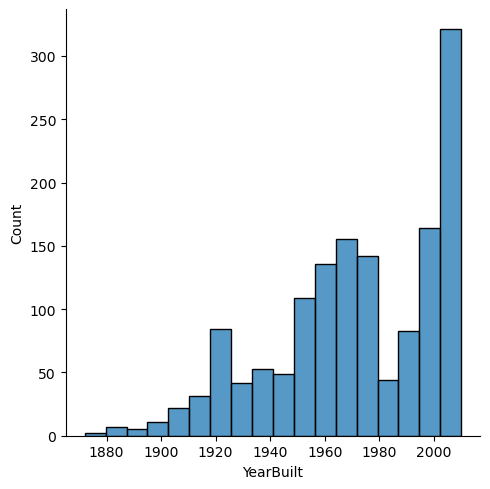

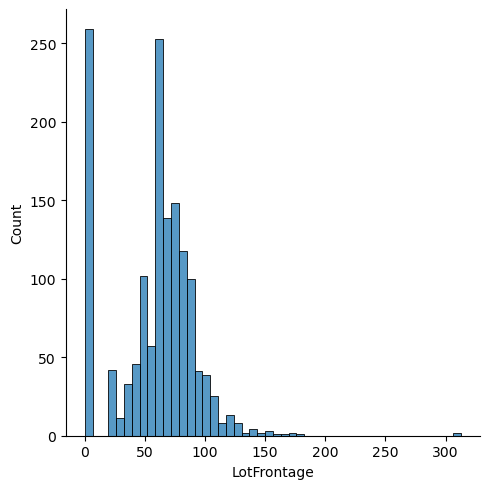

In [124]:
# Utilizamos seaborn para graficar un histograma de cada variable
RegresionLineal.plotHistWithSeaborn(dfData)

### 5. Para cada variable independiente x: 
- Calcular el coeficiente de correlación entre x y y
- Graficar x vs y (scatterplot) usando matplotlib
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica
- Basado en la gráfica y el coeficiente de correlación de cada par (x,y) elegir las 2 variables con más potencial predictivo, es decir, las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [125]:
# Calculamos coeficiente de correlación de cada columna usando método de Pearson
dictCorrelacion = RegresionLineal.getCorrCoef(dfData)
dictCorrelacion['SalePrice']

{'OverallQual': 0.7909816005838051,
 '1stFlrSF': 0.6058521846919145,
 'TotRmsAbvGrd': 0.5337231555820282,
 'YearBuilt': 0.5228973328794969,
 'LotFrontage': 0.20962394479948393}

In [126]:
# 2da manera de calcular coeficiente de correlación, obtenemos mismos datos que en la primer forma
dfDataCorr = RegresionLineal.getCorrCoef_v2(dfData)
dfDataCorr

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.209624
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.176561
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.245181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.221396
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.036853
LotFrontage,0.209624,0.176561,0.245181,0.221396,0.036853,1.000000


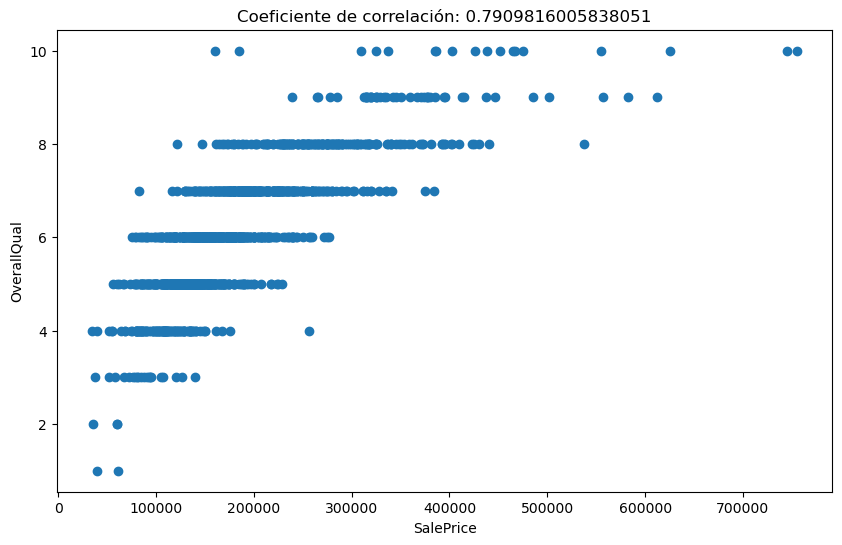

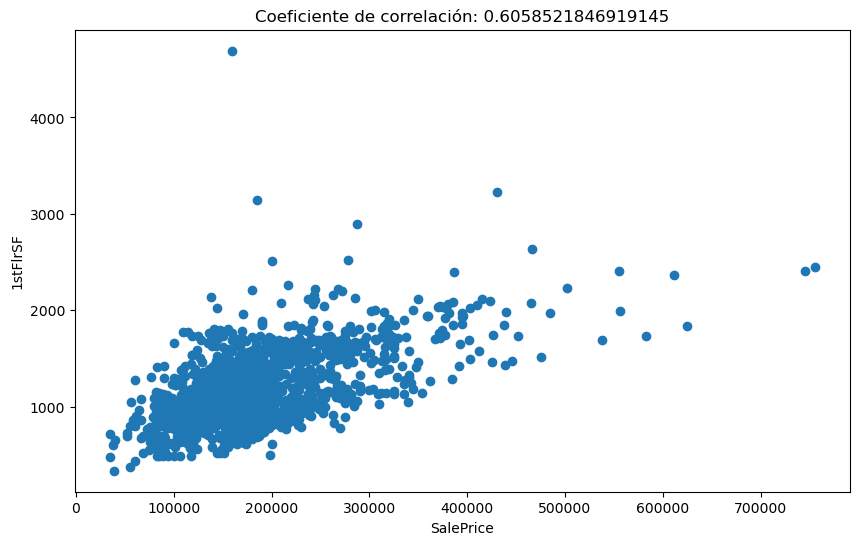

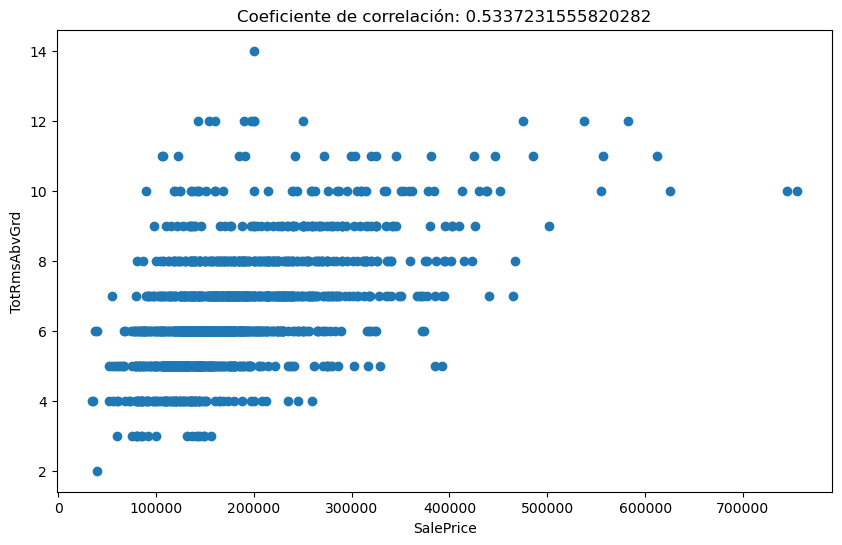

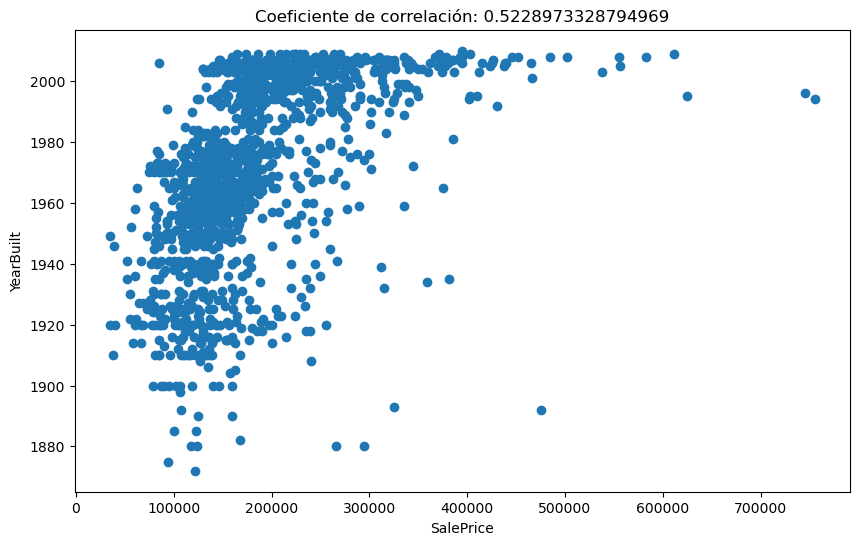

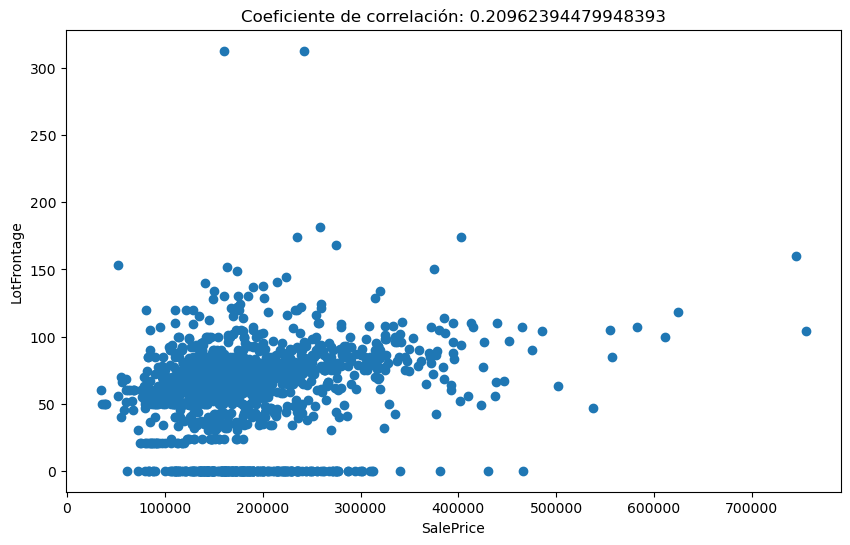

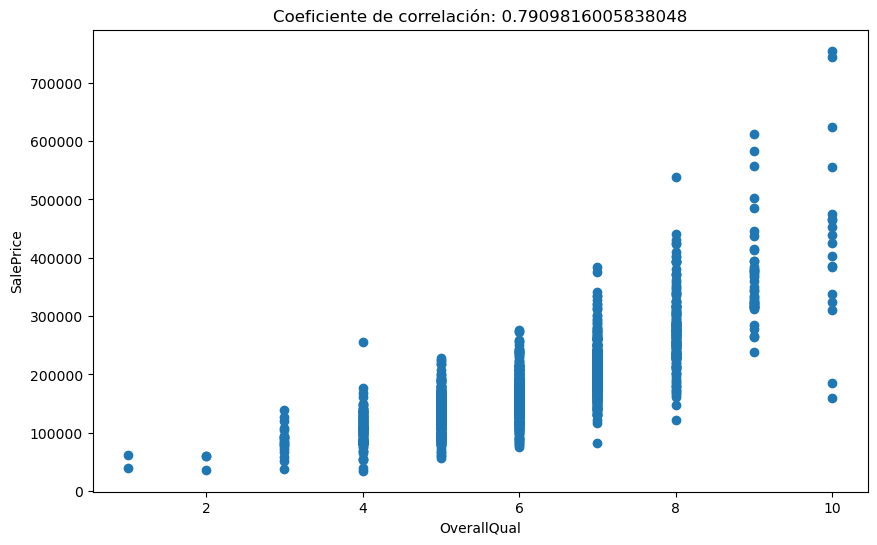

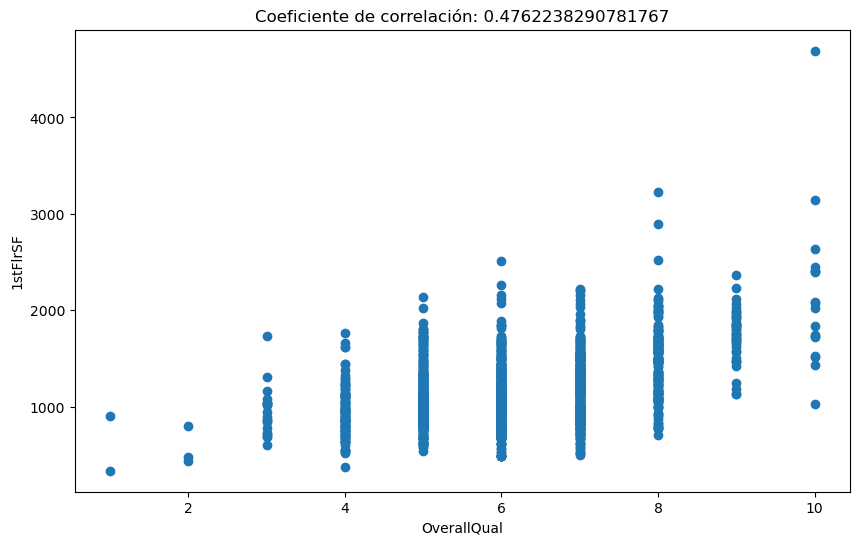

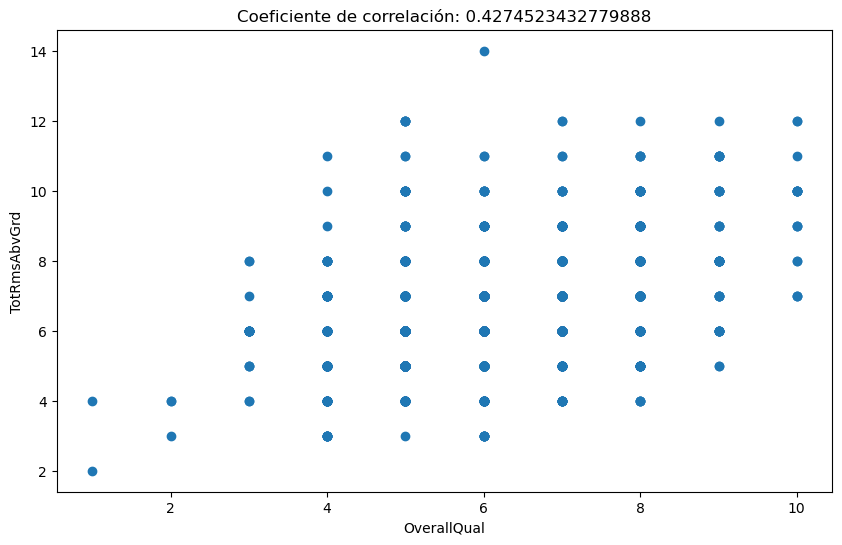

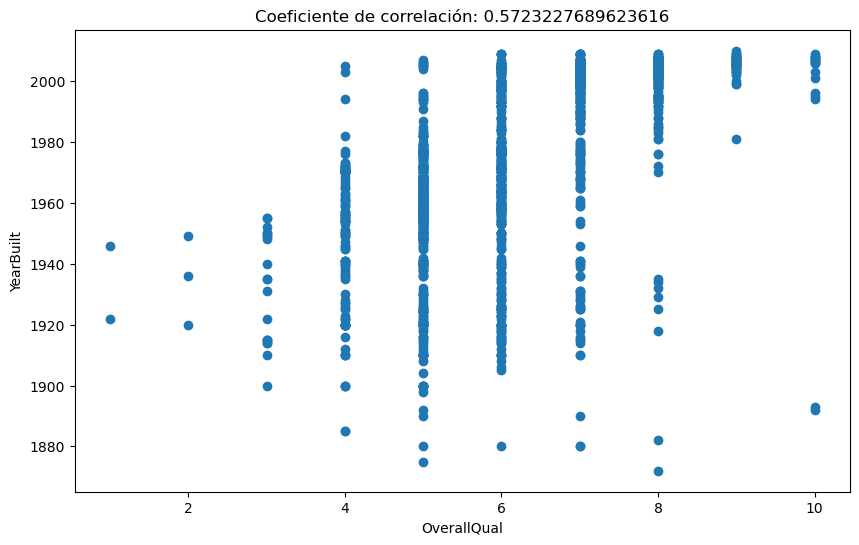

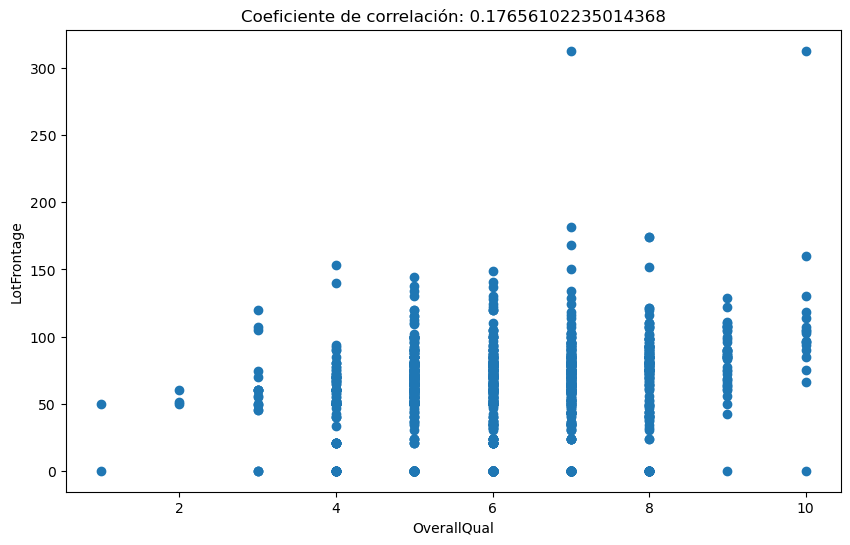

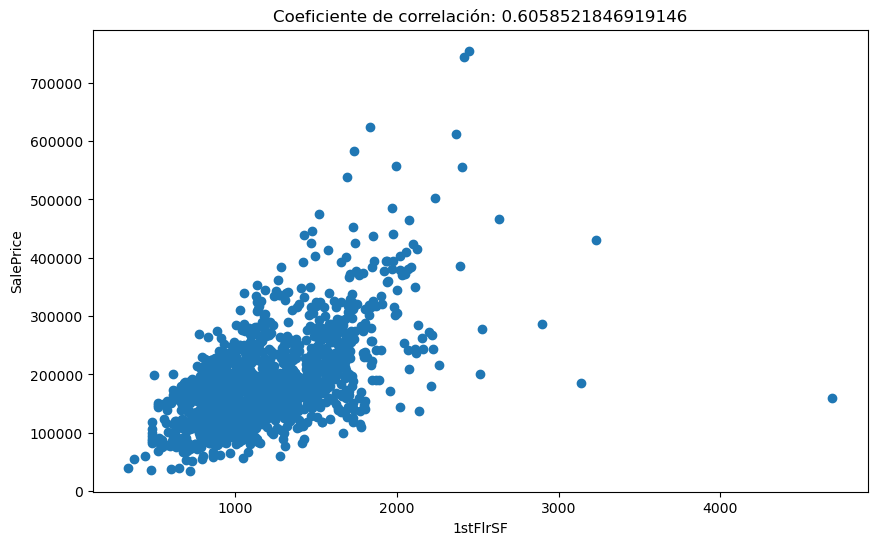

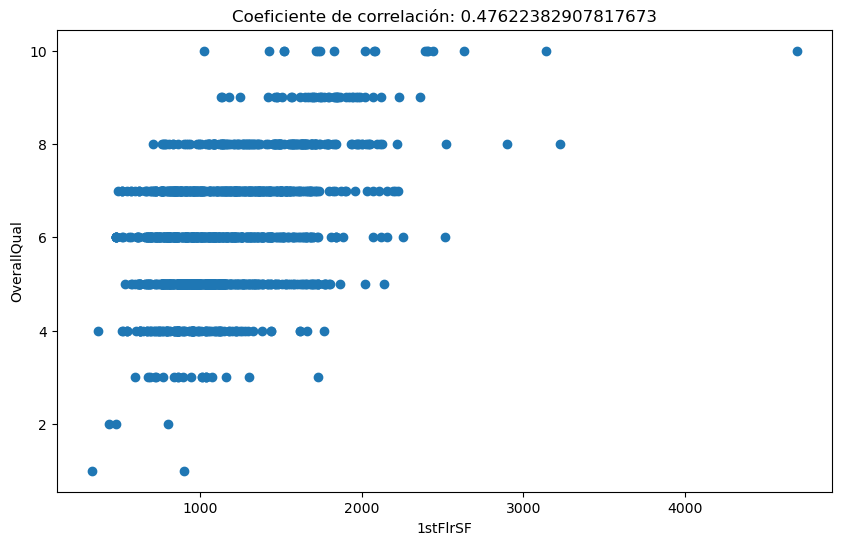

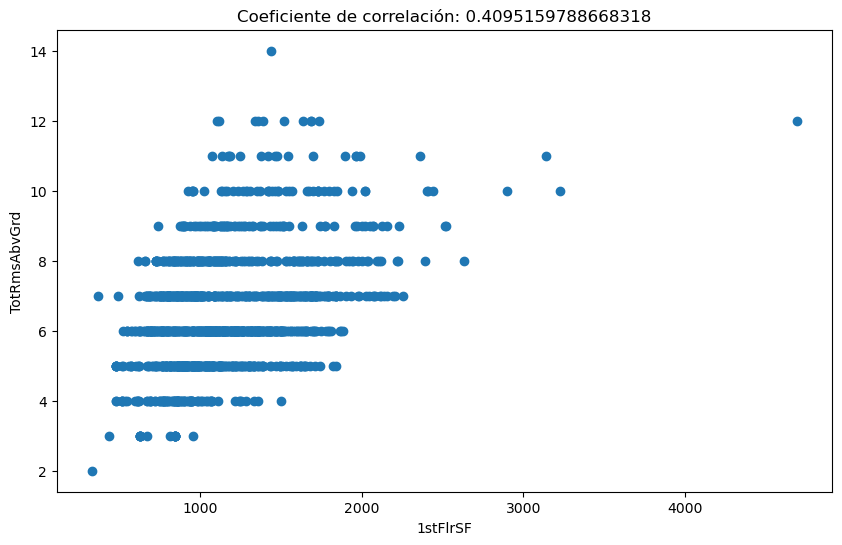

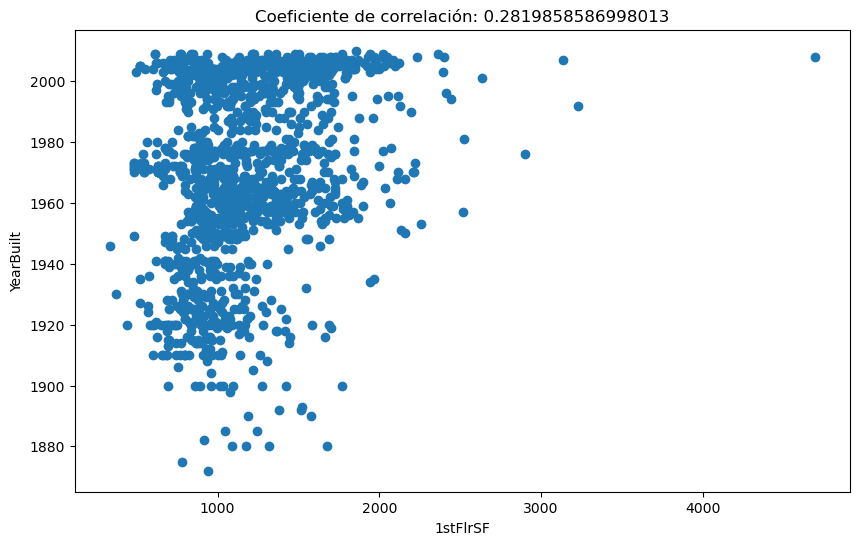

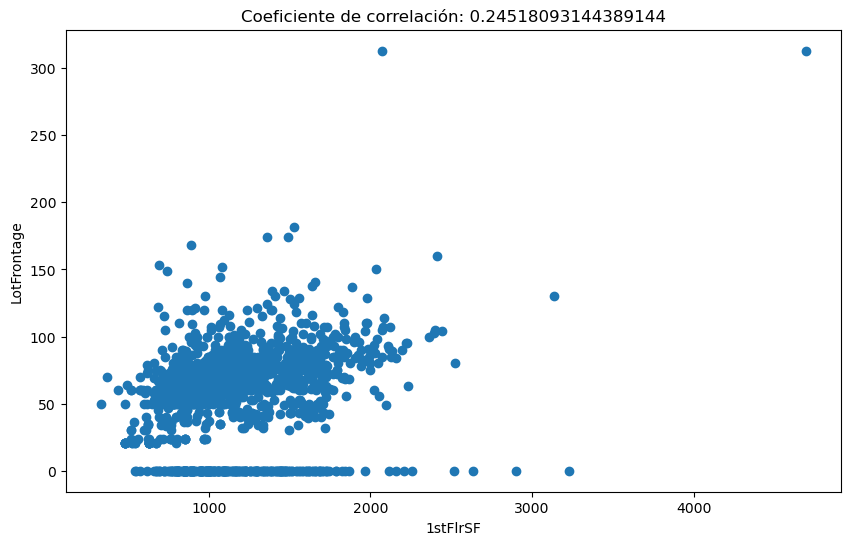

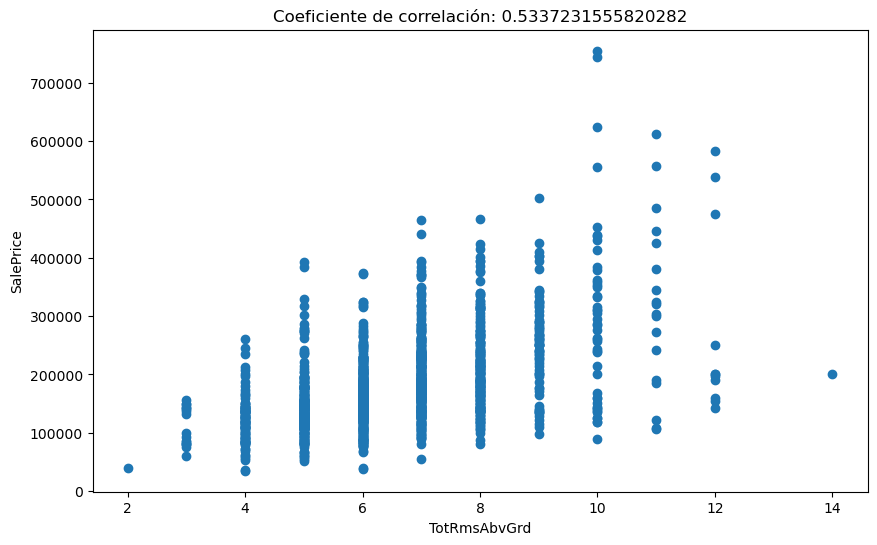

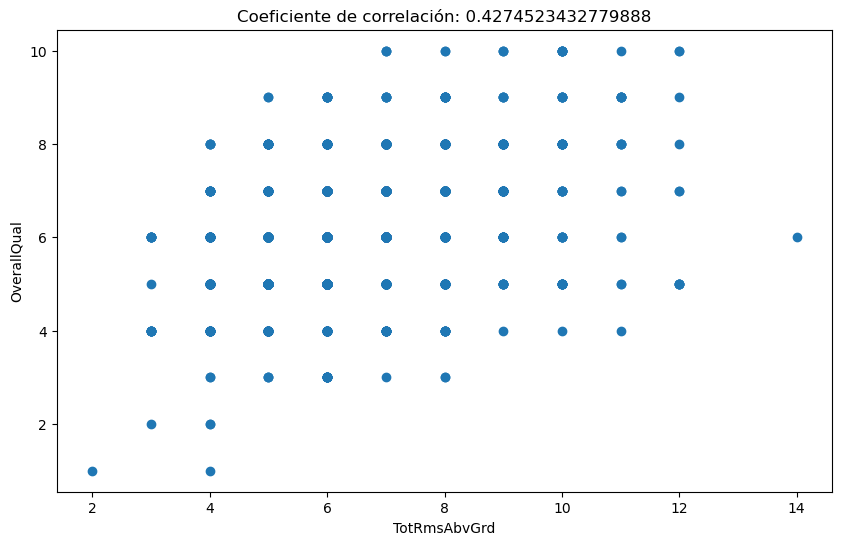

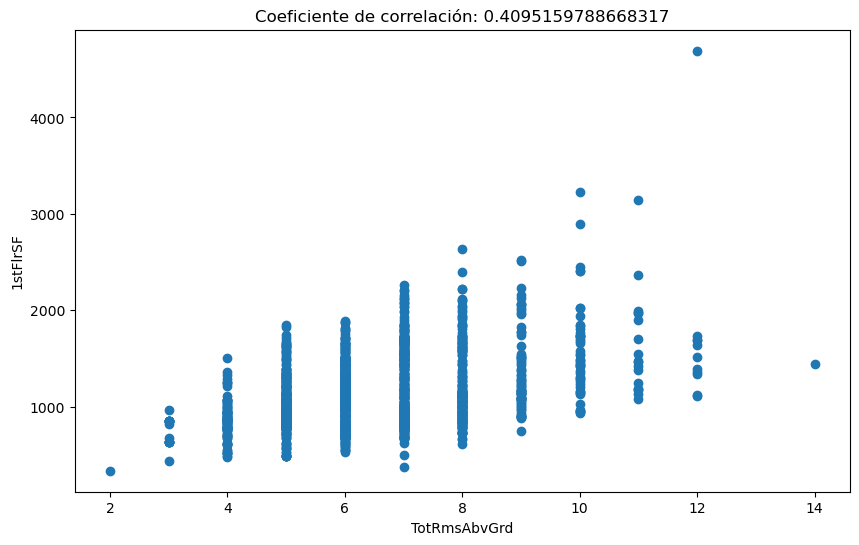

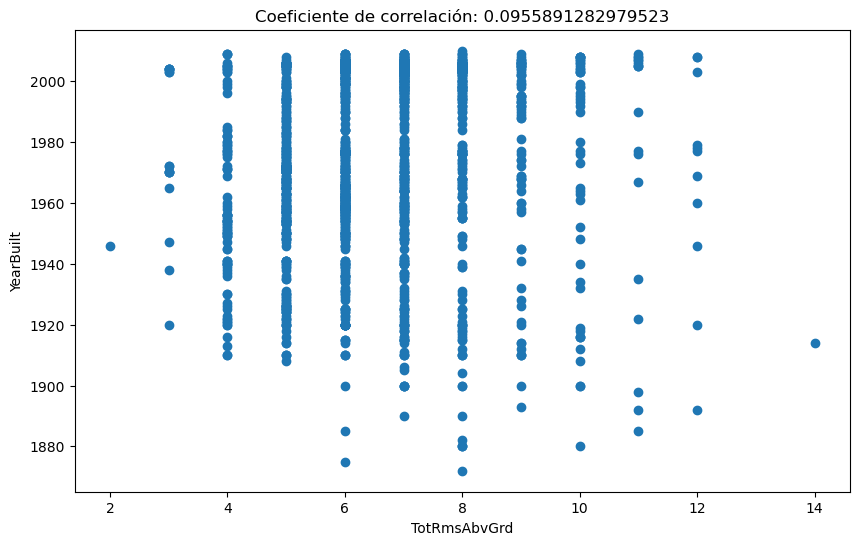

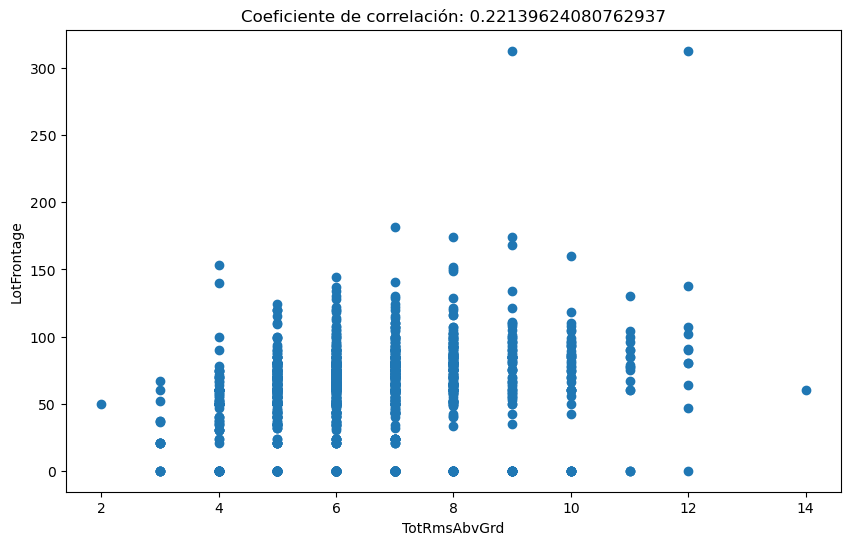

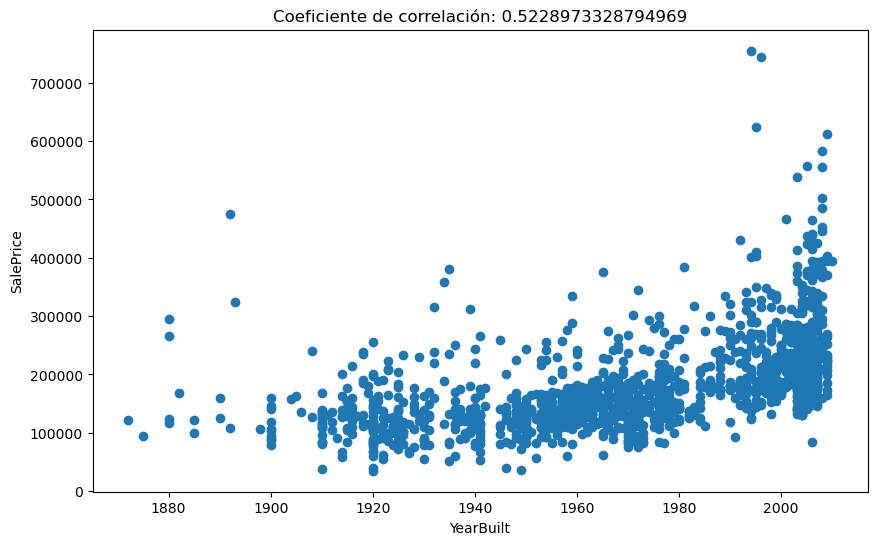

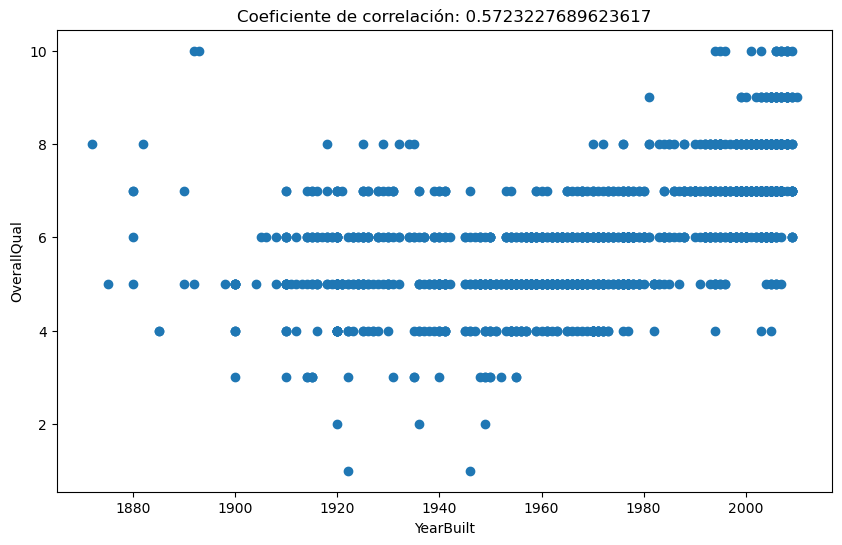

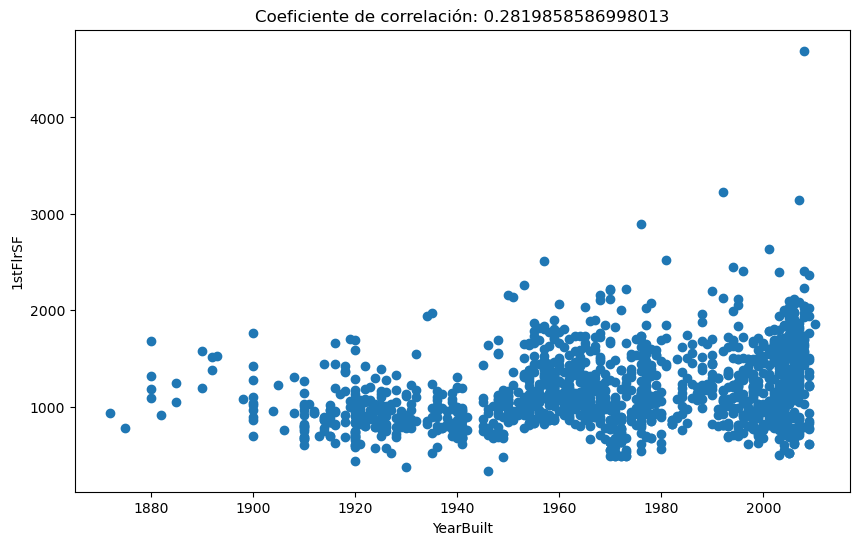

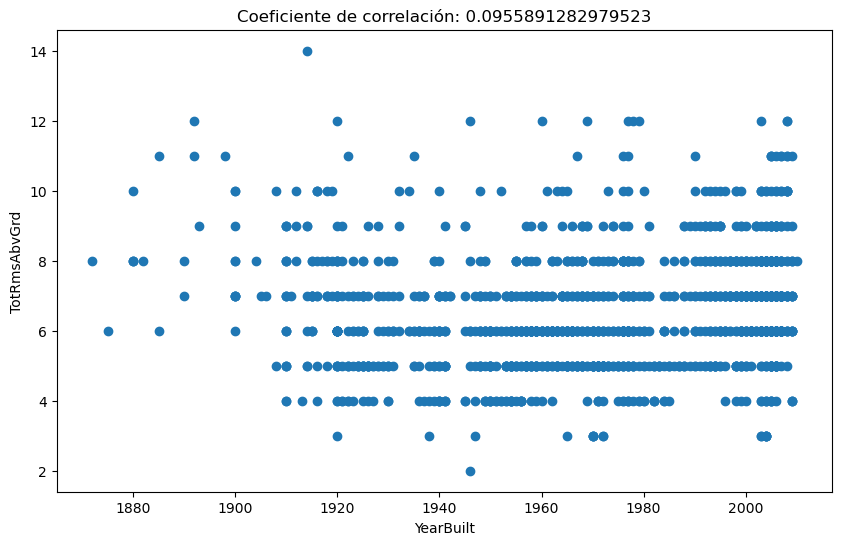

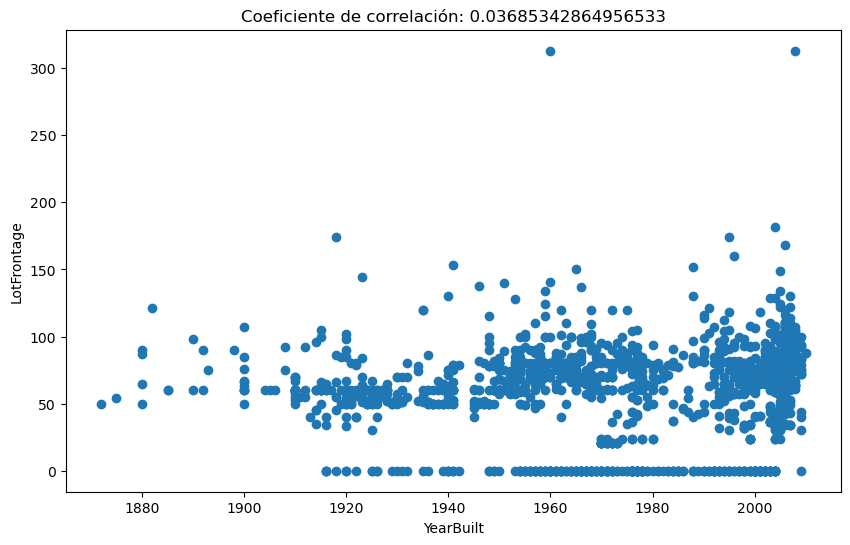

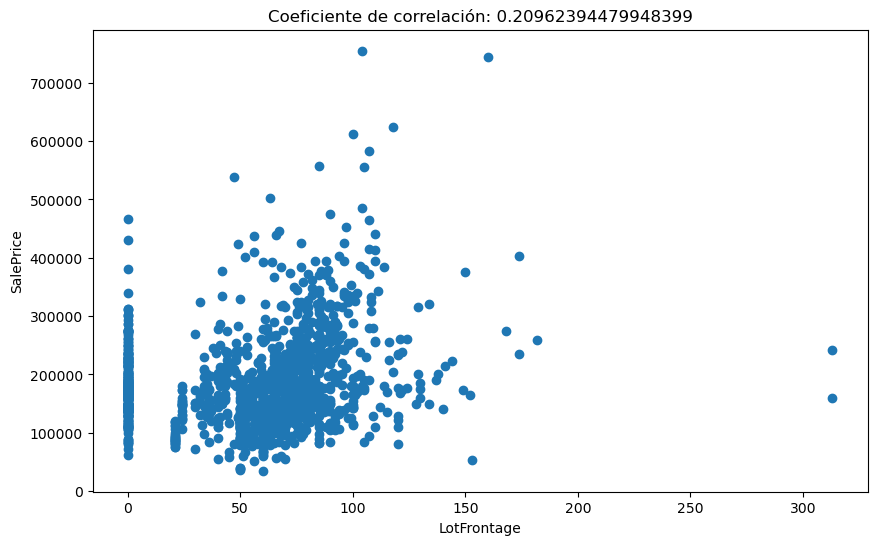

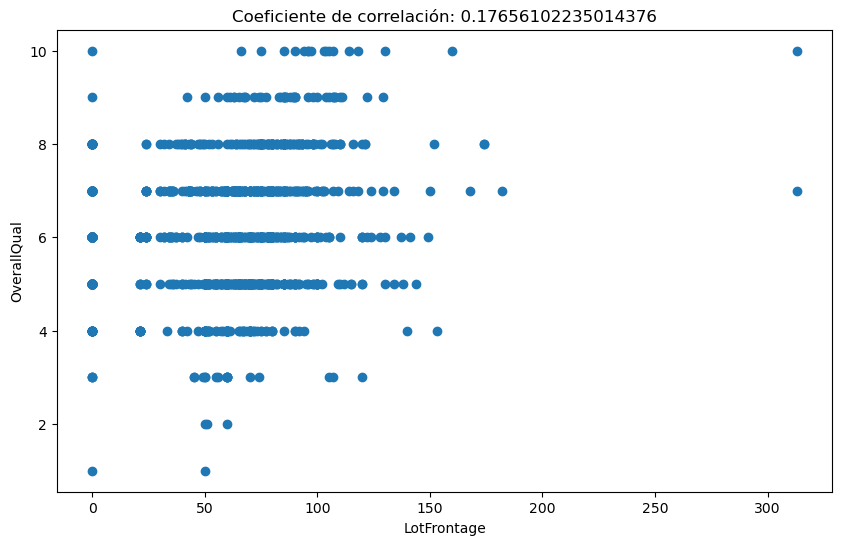

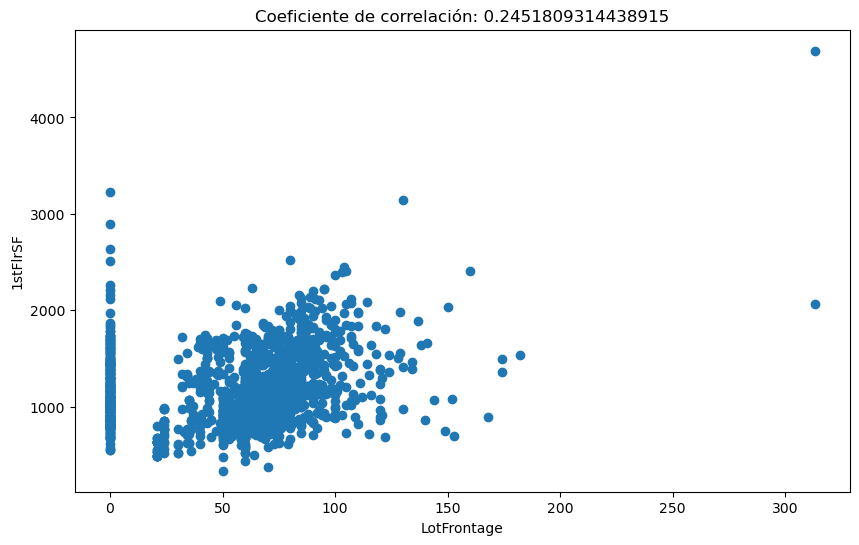

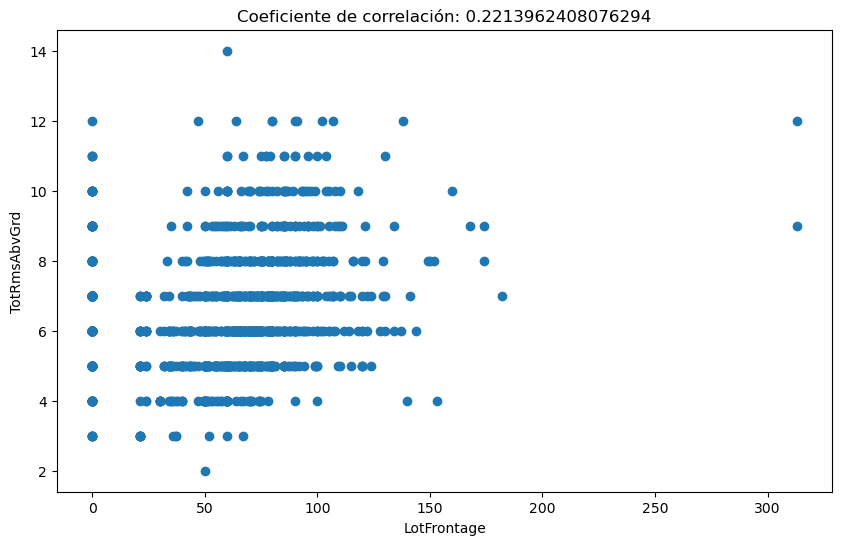

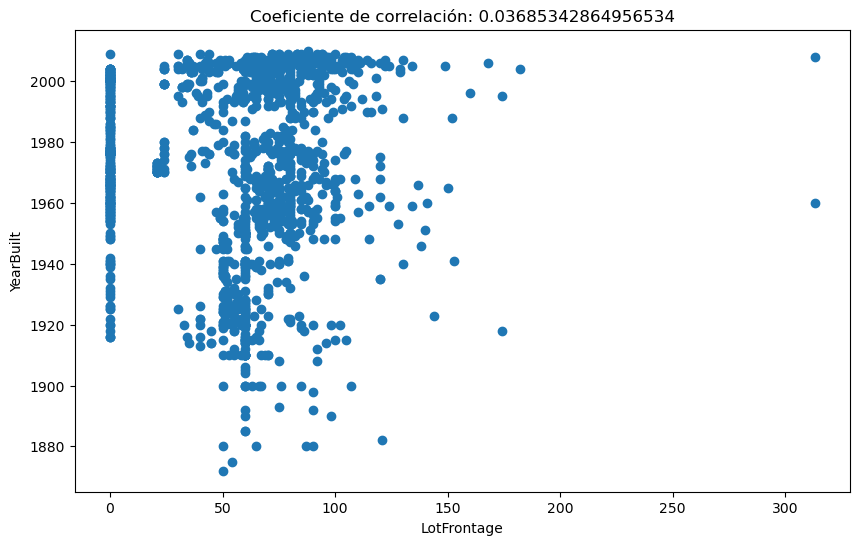

In [127]:
# Graficamos x vs y (scatterplot) usando matplotlib
RegresionLineal.scatterPlotCorrelation(dfData, dictCorrelacion)

In [ ]:
# Basado en la gráfica y el coeficiente de correlación de cada par x, y elegir las 2 variables con más
# potencial predictivo, es decir, las 2 variables que presentan mayor correlación entre dicha variable 
# y la variable dependiente

dfDataCorr

# Según el cálculo de correlación, la variable más alta es SalePrice con OverallQual presentando un 0.79
# Como dato: 1 = Correlación lineal positiva perfecta | -1 = Correlación lineal negativa perfecta 
# (Coeficiente de Pearson)

### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = B0 + B1 * x. 
#### La función recibe como argumentos: 
- Vector con la variable independiente x
- Vector con la variable dependiente y
- Un entero epochs que indica por cuantas iteraciones entrenar el modelo
- Un entero imprimir_error_cada, que nos indica cada cuantas iteraciones queremos imprimir a través de print: el numero de iteraciónm el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones 10, 20, 30, 40, 50
- Escalar (learning rate): Es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo

In [128]:
# Datos a utilizar
vectorCost = []
dictParamsHistory = dict()
yPredHist = []
dataTraining

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [129]:
# Ejecutando la función
vectorCost = []
# dictParamsHistory = dict()
# dataTraining['SalePrice']
respParamsHistory, respVectorCost, respYPred = RegresionLineal.trainingRegL(dataTraining['OverallQual'], dataTraining['SalePrice'], 400, 50, 0.001)

Epochs: 400
Error de iteración 0: 19409567140.736504
Error de iteración 50: 1695226420.5357146
Error de iteración 100: 1397483179.2626002
Error de iteración 150: 1391357730.3016753
Error de iteración 200: 1390120329.377617
Error de iteración 250: 1388970131.4022982
Error de iteración 300: 1387826728.771218
Error de iteración 350: 1386688749.9888206


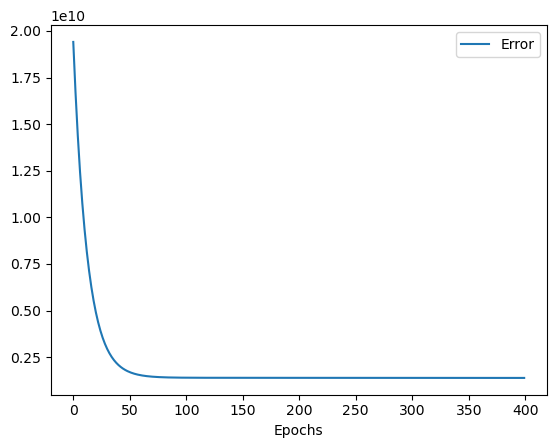

In [130]:
# Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo

RegresionLineal.graphError(respVectorCost)

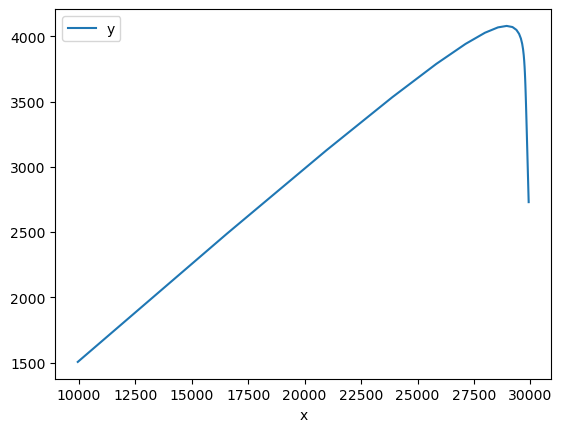

In [131]:
# Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo

RegresionLineal.graphModelByEpochs(respParamsHistory, 10)


Epochs: 150
Error de iteración 0: 737332.8277440068
Error de iteración 100: 65753.29272001231


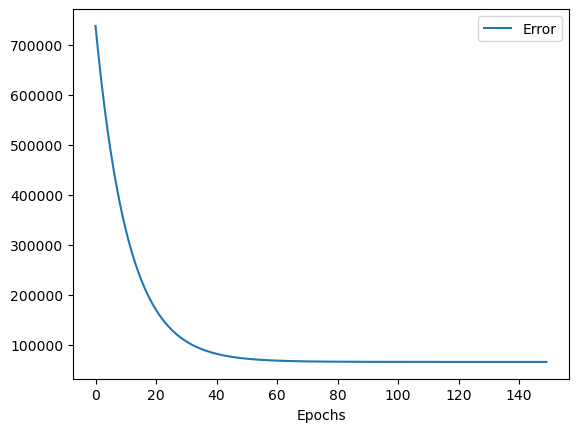

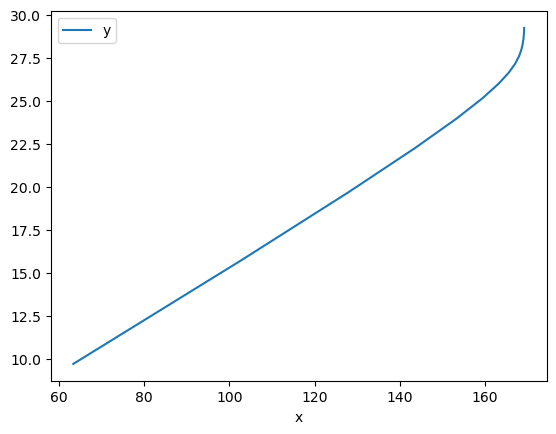

In [132]:
# Modelo de regresión X = TotRmsAbvGrd , Y = 1stFlrSF
vectorCost = []
dictParamsHistory = dict()
respParamsHistory, respVectorCost, respYPred = RegresionLineal.trainingRegL(dataTraining['TotRmsAbvGrd'], dataTraining['1stFlrSF'], 150, 100, 0.001)
RegresionLineal.graphError(respVectorCost)
RegresionLineal.graphModelByEpochs(respParamsHistory, 10)

Coeficientes: 
 [[1.38822386e-05]]
Error cuadrático medio: 0.701214
Coeficiente de determinación: 0.630420


/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/2984430223.py:158: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dt_X_training = dataTraining['SalePrice'][:, None]
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/2984430223.py:159: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dt_Y_training = dataTraining['OverallQual'][:, None]
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T/ipykernel_11898/2984430223.py:161: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dt_X_test = dataTests['SalePrice'][:, None]
/var/folders/84/9lhxzgfs4vg72cmkr47zph8r0000gn/T

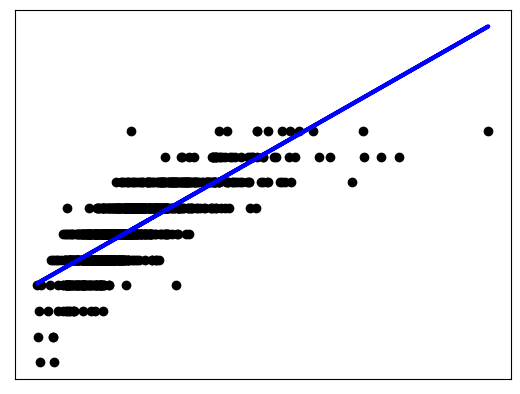

In [133]:
# Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal

dt_y_pred = RegresionLineal.graphModelWithScikitLearn(dataTraining, dataTests)

In [134]:
# Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo
# de scikit-learn calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción 
# estimada promediando las predicciones de los 2 modelos.

mtVector, stVector, arrMeanResponse = (RegresionLineal.predEstimada(respYPred, dt_y_pred))
print(arrMeanResponse)

[694.484305667457, 525.1386545856892, 525.4301815953081, 609.4297185663578, 779.3514825480869, 440.29230106288924, 610.588885485557, 609.8461857229563, 693.938733692313, 440.1187730809732, 440.19859595265456, 949.1691297406663, 355.7201217515166, 610.3980047054492, 440.3894767327622, 440.21594875084617, 440.3339477785491, 524.5035421718765, 524.9824794019647, 524.843657016432, 779.874148829618, 524.8464334641426, 610.0544193012555, 524.7804928310145, 524.9477738055815, 610.2369707382312, 440.2353838848208, 610.5819443662803, 525.3191236868819, 355.1960672461302, 524.1564862080444, 524.9154976009452, 609.7066692254958, 525.027596677263, 525.8050020362467, 779.7610085854087, 524.8853037320918, 440.3617122556557, 440.05630300748345, 524.4480132176634, 524.9894205212414, 440.47971128335854, 440.29924218216587, 440.2038017921121, 524.8575392549852, 526.0993054935764, 525.5425305519199, 610.1911593510054, 693.8214287765378, 524.7603635851123, 525.1074195489443, 524.6735995941542, 440.0632441

Imprimiendo error de x = OverallQuall contra Y = SalePrice
Epochs: 200
Error de iteración 0: 19959124616.97084
Error de iteración 50: 1871849133.6119204
Error de iteración 100: 1566664740.600834
Error de iteración 150: 1560338161.1499424


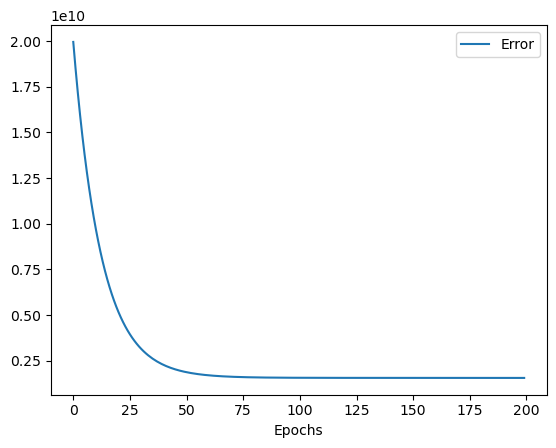

Imprimiendo error de x = OverallQuall contra Y = 1stFlrSF
Epochs: 200
Error de iteración 0: 798276.963989726
Error de iteración 50: 83306.01832709009
Error de iteración 100: 71284.62904716792
Error de iteración 150: 71077.27699110814


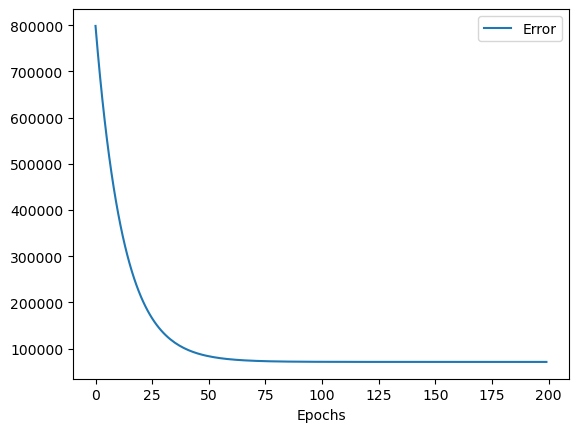

Imprimiendo error de x = OverallQuall contra Y = TotRmsAbvGrd
Epochs: 200
Error de iteración 0: 18.380085616438357
Error de iteración 50: 1.8378588963684594
Error de iteración 100: 1.5582557918685764
Error de iteración 150: 1.5519756990658464


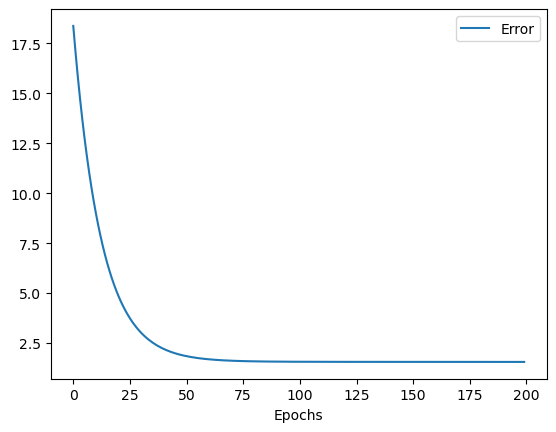

Imprimiendo error de x = OverallQuall contra Y = YearBuilt
Epochs: 200
Error de iteración 0: 1940391.6783732872
Error de iteración 50: 116586.52992926478
Error de iteración 100: 85524.88702350721
Error de iteración 150: 84594.71622116686


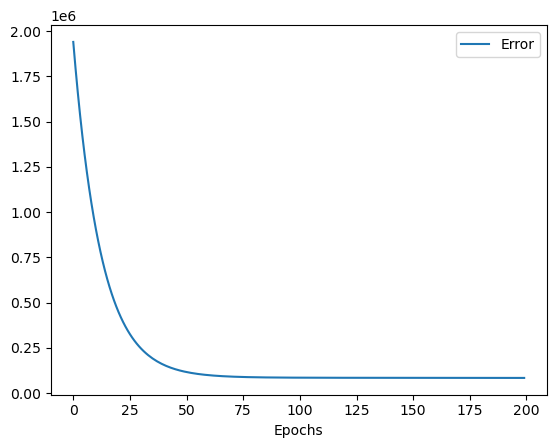

Imprimiendo error de x = OverallQuall contra Y = LotFrontage
Epochs: 200
Error de iteración 0: 2289.3040582191775
Error de iteración 50: 688.8661040293472
Error de iteración 100: 661.8972942671385
Error de iteración 150: 661.3730954604629


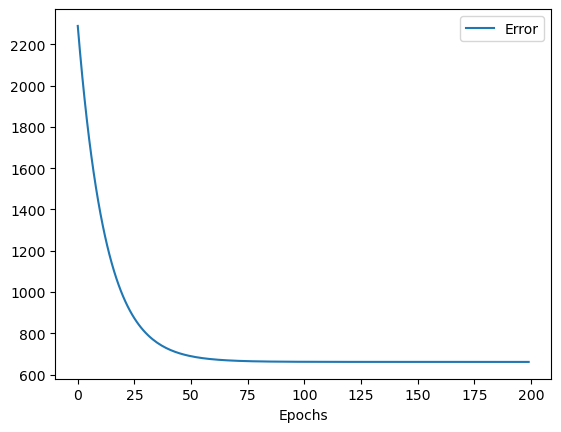

In [135]:
# Usando el 20 % de los datos de validación aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo.
# Graficar el error de cada modelo para la variable x
# Concluir cuál modelo para la variable x es el mejor a ser usado.

auxTest = dataTests.copy()
auxTest.reset_index(inplace=True)
auxTest = auxTest.drop(['index'], axis=1)

for col in dataTests.columns:
    if (col != 'OverallQual'):
        vectorCost = []
        dictParamsHistory = dict()
        yPredHist = []

        respParamsHistoryTest = dict()
        respVectorCostTest = []
        respYPredTest = []

        print("Imprimiendo error de x = OverallQuall contra Y = {}".format(col))

        respParamsHistoryTest, respVectorCostTest, respYPredTest = RegresionLineal.trainingRegL(auxTest['OverallQual'], auxTest[col], 200, 50, 0.001)
        RegresionLineal.graphError(respVectorCostTest)